x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_______________________________________________

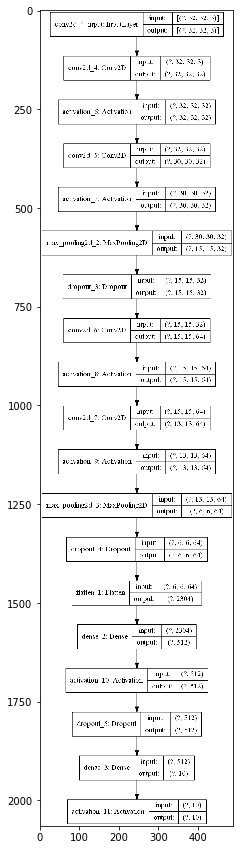

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

batch_size = 32
num_classes = 10
epochs = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_train /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

print(model.summary())
%matplotlib inline
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Generate the plot
plot_model(model, to_file = 'model_plot_cifar10.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread('model_plot_cifar10.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img) 

In [7]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

model.save("cifar_simple_cnn_2.h5")

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10
1563/1563 [==============================] - 71s 46ms/step - loss: 2.1458 - accuracy: 0.2102 - val_loss: 57935.6914 - val_accuracy: 0.1167
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.9912 - accuracy: 0.2847 - val_loss: 52197.6914 - val_accuracy: 0.1113
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.8965 - accuracy: 0.3172 - val_loss: 49397.2930 - val_accuracy: 0.1162
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.8210 - accuracy: 0.3466 - val_loss: 62223.4805 - val_accuracy: 0.1128
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.7542 - accuracy: 0.3683 - val_loss: 36913.3984 - val_accuracy: 0.2113
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.6950 - accuracy: 0.3884 - val_loss: 42185.9336 - val_accuracy: 0.2246
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.6371 - accuracy: 0.4

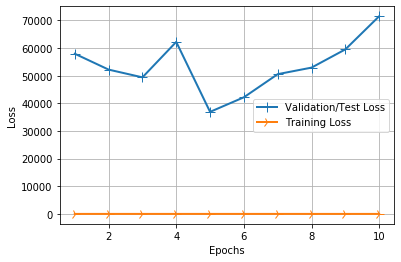

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

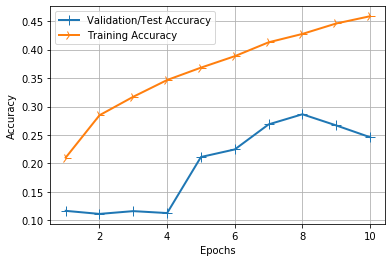

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()